In [54]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

#load data
df = sns.load_dataset('mpg')

#initial look at data
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
#check for NaN values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
# We see we have 6 NaN in horsepower so lets drop those
df.dropna(inplace=True) 
#check if it actually dropped
#check for NaN values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [17]:
#drop name column
df =df.drop(['name'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


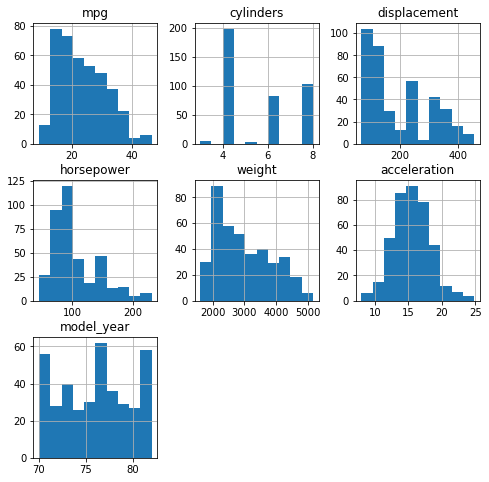

In [20]:
#look at data
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

In [22]:
#look at data
df[['cylinders', 'model_year', 'origin']].nunique()

cylinders      5
model_year    13
origin         3
dtype: int64

In [23]:
#Dealing with 'origin' data
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): ['ASIA', 'EU', 'USA']

In [24]:
# label encoding origins
cat_origin.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

In [28]:
#make dummies data
cyl_dummies = pd.get_dummies(df['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(df['model_year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(df['origin'], prefix='orig', drop_first=True)

#remove origional columns from df
df = df.drop(['cylinders','model_year','origin'], axis=1)
#add dummy columns
df = pd.concat([df, cyl_dummies, yr_dummies, orig_dummies], axis=1)
df.head()

,mpg,displacement,horsepower,weight,acceleration,cyl_4,cyl_5,cyl_6,cyl_8,yr_71,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_japan,orig_usa
0,18.0,307.0,130.0,3504,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,15.0,350.0,165.0,3693,11.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,16.0,304.0,150.0,3433,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17.0,302.0,140.0,3449,10.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# show relationship between all variables and target variable (mpg)

#df[df.columns[:]].corr()['mpg'][:] - my frankenstien code 
df.corr()['mpg'] '''code from Claude - much prettier'''



mpg             1.000000
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
cyl_4           0.760490
cyl_5           0.044171
cyl_6          -0.230873
cyl_8          -0.649667
yr_71          -0.081464
yr_72          -0.168353
yr_73          -0.274432
yr_74          -0.023137
yr_75          -0.117412
yr_76          -0.074024
yr_77          -0.002523
yr_78           0.025097
yr_79           0.059727
yr_80           0.361396
yr_81           0.239804
yr_82           0.315908
orig_japan      0.451454
orig_usa       -0.565161
Name: mpg, dtype: float64

In [40]:
# Choose one feature and create a baseline regression model
x = df['displacement'] #chose this one as it had the largest R 
y = df['mpg']



model = sm.formula.ols(formula='y~x', data=df).fit()
#model summart
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.66e-90
Time:                        13:16:49   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.1206      0.494     71.033      0.000      34.149      36.093
x             -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

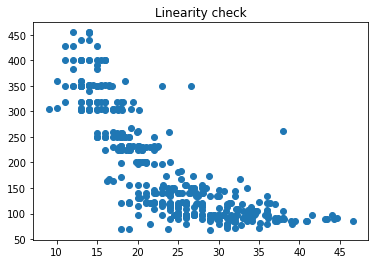

In [52]:
#basic scatterplot 
plt.scatter(df.mpg, df.displacement)
plt.title("Linearity check")
plt.show()

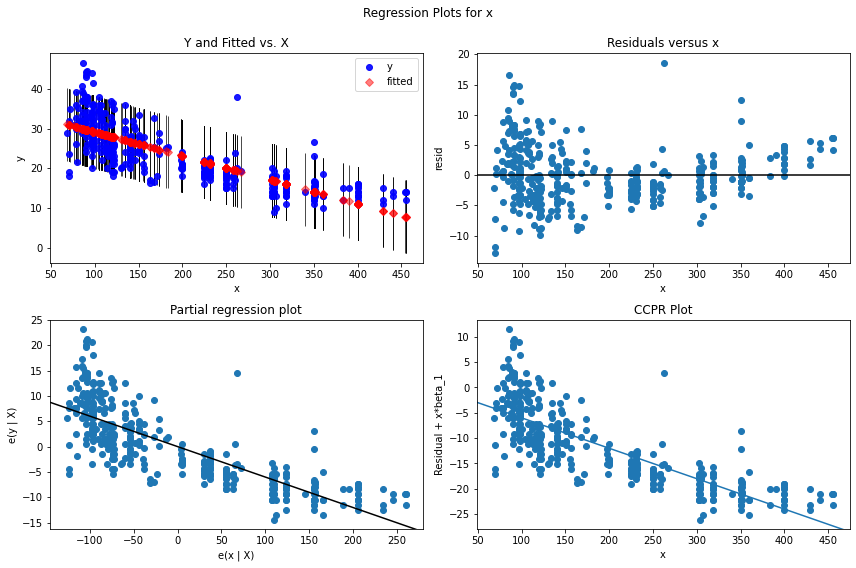

In [43]:
#model content
sm.graphics.plot_regress_exog(model, 'x', fig=plt.figure(figsize=(12, 8)));

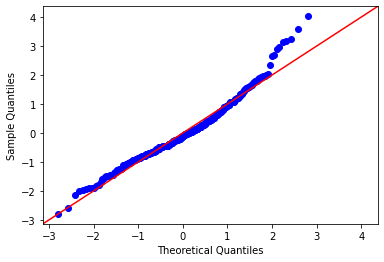

In [55]:

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
#commentary on model summary/graphs
'''
While the R was large, R^2 seems moderate (0.648), meaning the dependant variable ('mpg')
is only moderatly explained by the independant variable ('displacement'). This means there 
also a moderate margin of error in this linear regressions predictions. Based on the graphs, 
(along with the origional calculation of R) we see that there is a negative relationship between
the variables. The slpe of our regression line is -0.0601, and the Y-Intercept is 35.1206.
(The y-intercept also has a pretty high standard error- something to note).
'''

# Check 4 model assumptions
'''
1. Is there a linear relationship between X and Y?
    1a. Looks like it curves based on the scatterplot - 
    failing this assumpption, 
    
2. Are the variables independant?
    2a. A little unclear based on the plots, but when 
we look at the Durbin-Watson score (0.926) we see there is some 
positive autocorrelation ( scores closer to 2 indicates independance), 
indicating the variables are **not independant** - possibly failing this
assumption as well.

3. Are the errors normally distributed?
    3a. Doesn't seem like it based on the Q-Q plot, or the Jarque-Bera (JB)
    test from the summary
    
4. Is the data heteroscedastic?
From the first and second plot in the first row, we see a cone-shape which is
a sign of heteroscedasticity. (i.e. the residuals are heteroscedastic.)
This violates the fourth and final assumption.

# In summation - these variables fail all the assumptions for linearity, 
based on the data provided. I would not advise using a linear regression model 
for this data.
'''


In [56]:
#check p-value
model.pvalues

Intercept    3.202924e-225
x             1.660642e-90
dtype: float64

In [ ]:
''' 
We got very low p-values for the intercept and the slope, 
indicating that these coefficients are statisticaly signifigant.
Despite this, due to failing all of the linear assumptions (see 
above), I would not reccomend using linear regression to asses the
relationship between these variables.
'''